In [18]:
!pip install ipython-autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
time: 3.45 s (started: 2022-08-01 09:23:09 +00:00)


In [19]:
%load_ext autotime

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 2.67 ms (started: 2022-08-01 09:23:15 +00:00)


In [20]:
from math import sqrt, floor
import numpy as np

def naive_sharding(ds, k):
    """
    Create cluster centroids using deterministic naive sharding algorithm.
    
    Parameters
    ----------
    ds : numpy array
        The dataset to be used for centroid initialization.
    k : int
        The desired number of clusters for which centroids are required.
    Returns
    -------
    centroids : numpy array
        Collection of k centroids as a numpy array.
    """
    
    n = np.shape(ds)[1]
    m = np.shape(ds)[0]
    centroids = np.mat(np.zeros((k,n)))

    # Sum all elements of each row, add as col to original dataset, sort
    composite = np.mat(np.sum(ds, axis=1))
    ds = np.append(composite.T, ds, axis=1)
    ds.sort(axis=0)

    # Step value for dataset sharding
    step = floor(m/k)

    # Vectorize mean ufunc for numpy array
    vfunc = np.vectorize(_get_mean)

    # Divide matrix rows equally by k-1 (so that there are k matrix shards)
    # Sum columns of shards, get means; these columnar means are centroids
    for j in range(k):
        if j == k-1:
            centroids[j:] = vfunc(np.sum(ds[j*step:,1:], axis=0), step)
        else:
            centroids[j:] = vfunc(np.sum(ds[j*step:(j+1)*step,1:], axis=0), step)

    return centroids

def _get_mean(sums, step):
    """
    Vectorizable ufunc for getting means of summed shard columns.
    
    Parameters
    ----------
    sums : float
        The summed shard columns.
    step : int
        The number of instances per shard.
    Returns
    -------
    sums/step (means) : numpy array
        The means of the shard columns.
    """

    return sums/step

time: 52.8 ms (started: 2022-08-01 09:23:18 +00:00)


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import KMeans
import sklearn.metrics as metrics

time: 3.3 ms (started: 2022-08-01 09:23:21 +00:00)


In [22]:
df = pd.read_csv("https://github.com/sumit07041997/Thesis/blob/c6b55f17ee16bc3e5d774542ce3f860421d9beb5/iris.data?raw=true")
df=df.reset_index().T.reset_index().T
df

,0,1,2,3,4,5
index,index,5.1,3.5,1.4,0.2,Iris-setosa
0,0,4.9,3.0,1.4,0.2,Iris-setosa
1,1,4.7,3.2,1.3,0.2,Iris-setosa
2,2,4.6,3.1,1.5,0.2,Iris-setosa
3,3,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
144,144,6.7,3.0,5.2,2.3,Iris-virginica
145,145,6.3,2.5,5.0,1.9,Iris-virginica
146,146,6.5,3.0,5.2,2.0,Iris-virginica
147,147,6.2,3.4,5.4,2.3,Iris-virginica


time: 1.1 s (started: 2022-08-01 09:23:23 +00:00)


In [23]:
lable = df[5].copy()
data = df.drop(5,axis=1)
data = data.drop(0,axis=1)

lable.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: 5, dtype: int64

time: 40.8 ms (started: 2022-08-01 09:23:27 +00:00)


In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data= scaler.fit_transform(data)

time: 18 ms (started: 2022-08-01 09:23:29 +00:00)


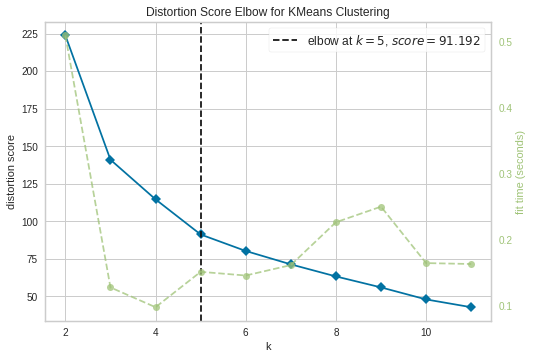

time: 2.73 s (started: 2022-08-01 09:23:30 +00:00)


In [25]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='distortion'
)
visualizer.fit(data)        
visualizer.show() 

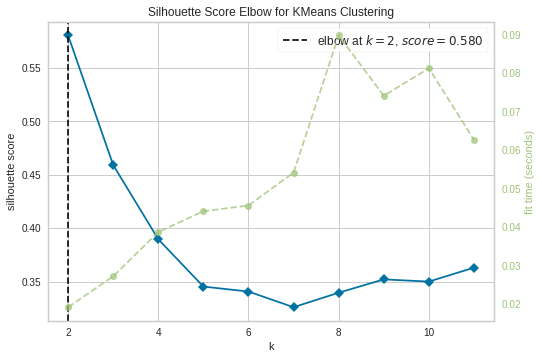

time: 924 ms (started: 2022-08-01 09:23:36 +00:00)


In [26]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='silhouette'
)
visualizer.fit(data)        
visualizer.show() 

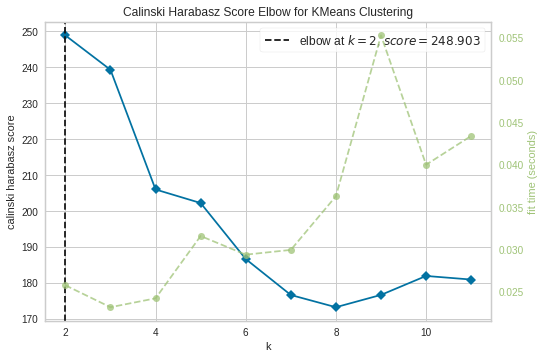

time: 696 ms (started: 2022-08-01 09:23:42 +00:00)


In [27]:
from yellowbrick.cluster import KElbowVisualizer
model=KMeans()
visualizer = KElbowVisualizer(
    model, k=(2,12), metric='calinski_harabasz'
)
visualizer.fit(data)        
visualizer.show() 

In [11]:
kmeans = KMeans(n_clusters=3,init='random', random_state=0).fit(data)
print('Iterations: ',kmeans.n_iter_)

Iterations:  6
time: 139 ms (started: 2022-08-01 09:19:15 +00:00)


In [13]:
kmeans = KMeans(n_clusters=3,init='k-means++', random_state=0).fit(data)
print('Iterations: ',kmeans.n_iter_)

Iterations:  5
time: 158 ms (started: 2022-08-01 09:20:08 +00:00)


In [14]:
3\\

Iterations:  7


/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,


array([[-1.01457897,  0.84230679, -1.30487835, -1.25512862],
       [-0.01139555, -0.87288504,  0.37688422,  0.31165355],
       [ 1.16743407,  0.15377779,  1.00314548,  1.02963256]])

time: 27.3 ms (started: 2022-08-01 09:20:16 +00:00)


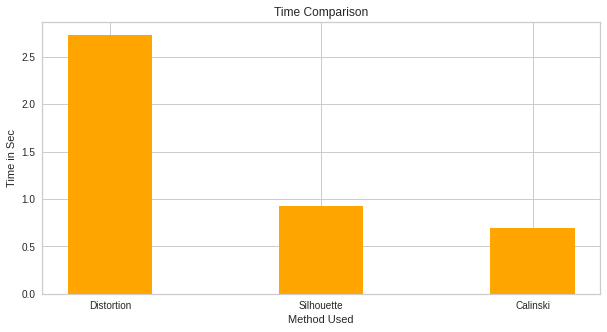

time: 155 ms (started: 2022-08-01 09:25:55 +00:00)


In [32]:
import numpy as np
import matplotlib.pyplot as plt
 

method = ['Distortion','Silhouette','Calinski']
time = [2.73,0.924,0.696]
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(method, time, color ='orange',
        width = 0.4)
 
plt.xlabel("Method Used")
plt.ylabel("Time in Sec")
plt.title("Time Comparison")
plt.show()